# Сборный проект № 1 

## Описание проекта

Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


Расположение данных: */dataset/games.csv*

Для импорта данных воспользуемся библиотекой *pandas*

In [1]:
import pandas as pd

In [2]:
games = pd.read_csv('../datasets/games.csv')

In [3]:
games.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


У нас таблица, состоящая из 16715 записей о играх разного времени и разных жанров. 
Имеется следующая информация об играх:

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы долларов)
* EU_sales — продажи в Европе (миллионы долларов)
* JP_sales — продажи в Японии (миллионы долларов)
* Other_sales — продажи в других странах (миллионы долларов)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. *Entertainment Software Rating Board*). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

При первичном анализе видно, что в части столбцов наблюдаются пропуски. Их природу мы выясним далее. 

Исходя из описания столбцов, можно выявить следующие проблемы с типами данных:
* Year_of_Release указан, как float64
* User_Score указан, как Object. 


Дальнейшую замену произведём в соответствующем пункте.

## 2. Подготовка данных

### Замена названией стобцов

Приведём название столбцов к единому нижнему регистру. Для этого воспользуемся функцией *map()*

In [5]:
games.columns = map(lambda x: x.lower(), games.columns.to_list())

In [6]:
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Преобразование к нужным типам данных


При изучении данных были выявлены следующие некорректные типы данных:

* year_of_release (float64) → DateTime
* user_score (object) → float64


In [7]:
games['year_of_release'] = pd.to_datetime(games['year_of_release'], format = '%Y', errors = 'ignore')

In [8]:
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989-01-01,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006-01-01,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006-01-01,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009-01-01,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984-01-01,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [9]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16713 non-null  object        
 1   platform         16715 non-null  object        
 2   year_of_release  16446 non-null  datetime64[ns]
 3   genre            16713 non-null  object        
 4   na_sales         16715 non-null  float64       
 5   eu_sales         16715 non-null  float64       
 6   jp_sales         16715 non-null  float64       
 7   other_sales      16715 non-null  float64       
 8   critic_score     8137 non-null   float64       
 9   user_score       10014 non-null  object        
 10  rating           9949 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 1.4+ MB


Посмотрим, какие значения у нас могут попадаться в столбце *user_score*.

In [10]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Помимо стандартных оценок от 1-10, у нас встречаются пропуски значений *nan* и значение **tbd*(*To be determined*)**, что означает оценка на данный момент не определена. Посмотрим, сколько игр имеет такое значение.

In [11]:
games.loc[games['user_score'] == 'tbd', 'user_score'].count()

2424

2424 с неопределенной оценкой. Из-за этих значений тип данных для столбца с пользовательской оценкой определяется, как *Object*.

Терять столько данных не хочется, поэтому определим их в отдельную категорию - "-1"

In [12]:
games.loc[games['user_score'] == 'tbd', 'user_score'] = games.loc[games['user_score'] == 'tbd', 'user_score'].replace('tbd', -1)

In [13]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16713 non-null  object        
 1   platform         16715 non-null  object        
 2   year_of_release  16446 non-null  datetime64[ns]
 3   genre            16713 non-null  object        
 4   na_sales         16715 non-null  float64       
 5   eu_sales         16715 non-null  float64       
 6   jp_sales         16715 non-null  float64       
 7   other_sales      16715 non-null  float64       
 8   critic_score     8137 non-null   float64       
 9   user_score       10014 non-null  object        
 10  rating           9949 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 1.4+ MB


### Обработка пропусков

Посмотрим, сколько пропусков по каждому столбцу. 

In [14]:
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

У нас наблюдаются пропуски в следующих местах:

* name
* year_of_release 
* genre
* critic_score
* user_score
* rating

Записи с пропусками в наименовании, годе релиза и жанре, мы можем удалить. Все эти значения являются категориальными и могут повлиять на следующие выводы если им присвоить некорректное значение. 


In [15]:
# Drop name + year_of_release + genre
games.dropna(subset = ['name','genre','year_of_release'],
            inplace = True)

In [16]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16444 non-null  object        
 1   platform         16444 non-null  object        
 2   year_of_release  16444 non-null  datetime64[ns]
 3   genre            16444 non-null  object        
 4   na_sales         16444 non-null  float64       
 5   eu_sales         16444 non-null  float64       
 6   jp_sales         16444 non-null  float64       
 7   other_sales      16444 non-null  float64       
 8   critic_score     7983 non-null   float64       
 9   user_score       9839 non-null   object        
 10  rating           9768 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 1.5+ MB


In [17]:
games[['critic_score','user_score','rating']].isna().sum()

critic_score    8461
user_score      6605
rating          6676
dtype: int64

В оценочных столбцах у нас наблюдается большре количество значений с пропусками. 
Посмотрим на описание столбцов c оценкой критиков и пользователей.

In [18]:
games[['critic_score','user_score']].describe()

,critic_score
count,7983.000000
mean,68.994363
std,13.920060
min,13.000000
25%,60.000000
50%,71.000000
75%,79.000000
max,98.000000


Видно, что распределение максимальных и минимальных значений соответствует требования, однако в *user_score* имеются значения -1. Причиной этому является замена *tbd* значений на "-1". Это повлияло на средние значения, однако медианы более устойчивые к такому. 
Произведём замену на медианное значение. 

In [19]:
games.loc[games['critic_score'].isna(),'critic_score'] = games['critic_score'].median()
games.loc[games['user_score'].isna(),'user_score'] = games['user_score'].median()

games[['critic_score','user_score','rating']].isna().sum()

critic_score       0
user_score         0
rating          6676
dtype: int64

У нас осталось 6676 пропусков в столбце с рейтингом игры. Rating является категориальным и означает возрастной рейтинг игры (основанный на рейтинге ESRB). Посмотрим подробнее на обозначения. 

«EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и старше и не содержит материалов, которые родители могли бы счесть неподходящими. 

«E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории старше 6 лет; такие игры могут понравиться и взрослым.

«E10+» («Everyone 10 and older») — «Для всех старше 10 лет»: Возрастная категория — от 10 лет. Проекты с данным рейтингом могут содержать немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены.

«T» («Teen») — «Подросткам 13—19 лет»: Игра подходит для подростков старше 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор.

«M» («Mature») — «От 17 лет»: Материалы игры не подходят для возрастной категории младше 17 лет. 

«AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое, а также сцены с обнажением.

«RP» ( «Rating Pending»») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоение рейтинга. 

Рейтинг K-A ("Kids - adluts") - в 1998 году был переименован в "Е"

Наличие пропусков возможно по причине отсутствия рейтинга на момент создания таблицы или по причине использования другой системы.

* В Соединенных Штатах Америки пользуются оценками организации ESRB
* Большая часть Европы использует оценки PEGI
* В Японии пользуются оценками CERO

Сохраним такие пропуски в отдельную категорию - *-1*. При дальнейшем анализе можно будет точно определить такие значения для их исключения из проверки. 

In [20]:
games.loc[games['rating'].isna(), 'rating'] = '-1'

In [21]:
games.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Дополнительно, у нас в таблице имеются записи "K-A", которые равняются рейтингу "Е". Заменим эти значения в соответствии:

In [22]:
games.loc[games['rating'] == "K-A",'rating'] = 'E'

### Выводы

В процессе обработки пропусков были найдены пропущенные значения в следующих столбцах:

* name
* year_of_release 
* genre
* critic_score
* user_score
* rating

Пропуски в столбцах с наименованием, годом релиза и жанром могут быть обусловлены некорректным заполнением таблицы. Каким-либо образом восстановить данные не получится, поэтому корректно будет их убрать.

Исключить пропуски из рейтинга и оценок, к сожалению, нельзя. При этом мы потеряем ~ 1/3 часть всех данных. Пользовательскую оценку и оценку критиков мы можем заменить на медианное значение. Такое заполнение не меняет распределение и не вносит никакой дополнительной информации. 

Пропуски в возростном рейтинге могут быть обусловлены некоректным заполнением, так и разной градацией оценок и систем оценивания в разных странах. Было решено отделить такие значения в отдельную категорию *-1*, по которой мы сможем отфильтровать. 


### Суммарные продажи во всех регионах.

Информация о продажах хранится в столбцах:
* na_sales           
* eu_sales           
* jp_sales           

Просуммируем их в итоговый столбец - *total_sale*

In [23]:
games['total_sale'] = games['na_sales'] +  games['eu_sales'] +  games['jp_sales'] 

In [24]:
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8,E,74.09
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,71.0,6.9,-1,39.47
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,32.23
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8,E,29.82
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,71.0,6.9,-1,30.38
5,Tetris,GB,1989-01-01,Puzzle,23.20,2.26,4.22,0.58,71.0,6.9,-1,29.68
6,New Super Mario Bros.,DS,2006-01-01,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,26.92
7,Wii Play,Wii,2006-01-01,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,26.07
8,New Super Mario Bros. Wii,Wii,2009-01-01,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,26.08
9,Duck Hunt,NES,1984-01-01,Shooter,26.93,0.63,0.28,0.47,71.0,6.9,-1,27.84


## 4. Исследовательский анализ данных


### Сколько игр выпускалось в разные годы?

Для просмотра статистики по годам, составим сводную таблицу. За индексы возьмем года, а значения - наименование игр. С помощью параметра *aggfunc = 'count'* подсчитаем кол-во игр, выпущенных за каждый год. 

In [25]:
year_distrib = games.pivot_table(index = 'year_of_release',
                  values = 'name',
                 aggfunc = 'count')
year_distrib.head(10)

,name
year_of_release,
1980-01-01,9
1981-01-01,46
1982-01-01,36
1983-01-01,17
1984-01-01,14
1985-01-01,14
1986-01-01,21
1987-01-01,16
1988-01-01,15


По данной таблице не очень явно можно определить прогрессию выпуска игр. Построим график кол-ва игр в год. 

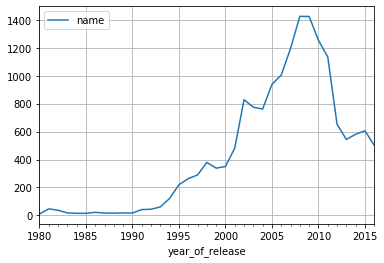

In [26]:
import matplotlib.pyplot as plt

year_distrib.plot(grid = True)

Теперь мы можем более явно увидеть самые активные промежутки разработки игр. Резкий рост производства игр начался с 2000 года и продолжился до 2009 года. После этого роста произошёл спад. 

Основной массив данных будет размещён в промежутке с 1990 года по 2010. По нему можно будет отследить влияние рейтингов, жанров, платформ и рейтингов на продажи и производство игра. 

### Как менялись продажи по платформам. 

Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Составим сводную для определения топа популярных платформ. 

In [27]:
platform_sales = games.pivot_table(index = 'platform', 
                 values = 'total_sale',
                 aggfunc = 'sum').sort_values(by = 'total_sale', ascending = False)
platform_sales.head(15)

,total_sale
platform,
PS2,1043.09
X360,876.36
Wii,813.47
PS3,796.75
DS,743.74
PS,686.89
GBA,305.27
PS4,265.79
PSP,248.77


Отделим топ-15 прибыльных платформ и сохраним их в список. 

In [28]:
top_15_platform = platform_sales[0:15].index.to_list()
top_15_platform

['PS2',
 'X360',
 'Wii',
 'PS3',
 'DS',
 'PS',
 'GBA',
 'PS4',
 'PSP',
 'GB',
 'NES',
 '3DS',
 'XB',
 'PC',
 'N64']

Создадим срез таблицы по самым популярным платформам для дальнейшего построения графика.

In [29]:
top_15_stat = games.query('platform in @top_15_platform')

Создадим график, в котором по горизонтали будут указаны года релизов, по вертикали - сумма продаж.

Различные плафтормы будут выделены отельными 

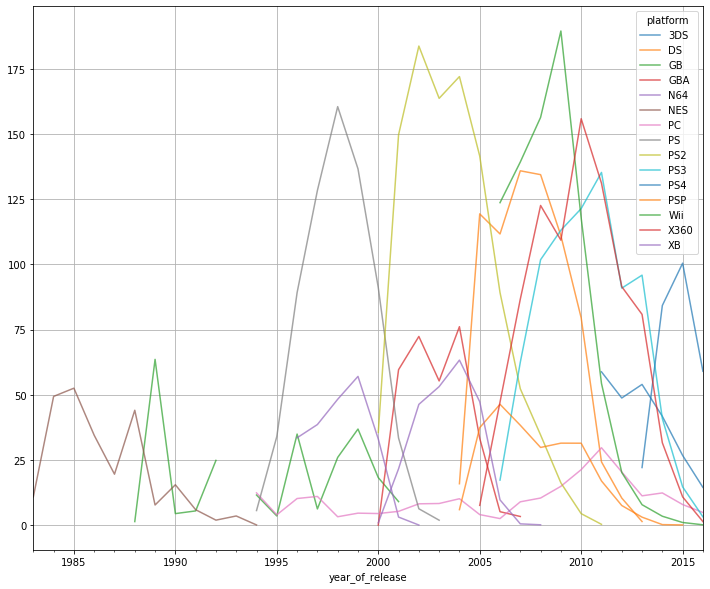

In [30]:
top_15_stat.pivot_table(index = 'year_of_release',
                       values = 'total_sale',
                       columns = 'platform',
                       aggfunc = 'sum').plot(grid = True, 
                                             figsize = (12,10),
                                            alpha = 0.7)

По таблице можно увидеть, что примерное "время жизни" консоли ~ 8 лет. Исключением является GB (GameBoy). Игры под эту платформу выпускались с 1988 по 2001, однако пиковые продажи были только в начале. 

Также стоит отметить PC. Данная платформа актуальна с 1995 года и продолжает быть актуальной, несмотря на относительно низкие продажи.

С остальными платформами ситуация похожа. После запуска платформы наблюдается рост популярности. У некоторых платформ наблюдается несколько пиков популярности. 

### Выбор актуальных данных

Исходя из ранее проведённого анализа, можно сделать вывод, что актуальные данные находятся с 2010 года. Именно с этого года начали появляться консоли "нового поколения" и прекращались продажи старых консолей. Выделим эти данные в отдельную таблицу *actual_games*

In [31]:
actual_games = games.query('year_of_release > "2010"').reset_index(drop=True)

### Потенциально актуальные платформы

Рассмотрим, какие из платформ:
* Лидируют по продажам
* Продажи растут
* Продажи падают

После, выберем потенциально прибыльноые платформы.

Посмотрим топ-5 платформ за данный промежуток времени (по продажам)

In [32]:
actual_games.pivot_table(index = 'platform',
                        values = 'total_sale',
                        aggfunc = 'sum').sort_values(by = 'total_sale', ascending = False)

,total_sale
platform,
PS3,380.75
X360,347.25
PS4,265.79
3DS,244.54
XOne,145.05
Wii,87.13
PC,86.58
WiiU,76.24
PSV,47.38


В лидирах на данном промежутке находятся PS3, X360, PS4, 3DS, XOne

Из графика ранее мы сделали вывод, что у консолей примерное время активности = 8 лет. За эти 8 лет платформа выходит на свой пик продаж ( а иногда пиков несколько) и после наблюдается падение продаж. 

Построим график с данными за актуальный период и посмотрим - какие платформы лидируют, какие набирают обороты, а какие угасают. 

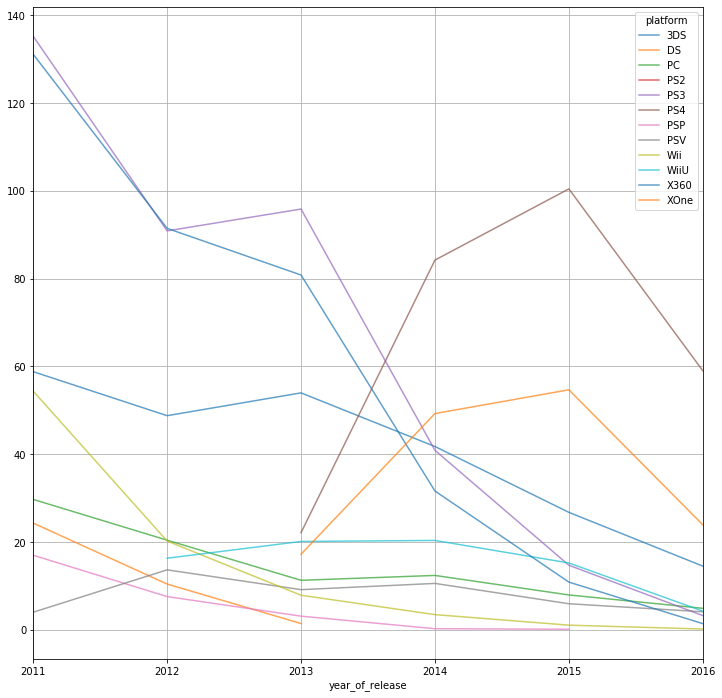

In [33]:
actual_games.pivot_table(index = 'year_of_release',
                       values = 'total_sale',
                       columns = 'platform',
                       aggfunc = 'sum').plot(grid = True, 
                                             figsize = (12,12),
                                            alpha = 0.7)

Исходя из предыдущего анализа мы знаем, что примерный срок "жизни" консолей составляет 8 лет. Xbox One и PS4 вышли в 2013 году и ожидается, что они будут актуальными до 2021. Если сравнить с 2015 годом, то видно падение продаж. Предположительно, в 2017-2018 будут выпущены новые (обновленные консоли) с эксклюзивами для поднятия продаж. 

Потенциально прибыльными являются:
* XOne
* PS4
* PC

PC в данную категорию попал не просто так. Ранее, мы выяснили, под эту платформу игры выпускаются с 1995 года и по сей день выпускаются. Компьютеры выбиваются из общей тенденции, так как объединяют в себе большой функционал, где игры - одна из возможностей. 

Выпуск игр под эту платформу оправдан всегда, так как платформа не перестанет существовать ближайшие годы.

В топе по прибыли за данный промежуток времени у нас Xbox 360 и PS3, однако выпуск игр под данные платформы не оправдан, так как происходит падение прибыли и "жизненный цикл" этих консолей завершается. 

### "Ящик с усами" по глобальным продажам

Построим "ящики с усами" по глобальным продажам потенциально прибыльным платформам для отслеживания следующих параметров:

* Разница в продажах
* Разница в средних продажах 

In [34]:
potential_platform = actual_games.query('platform == ["PS4","XOne","PC"]')

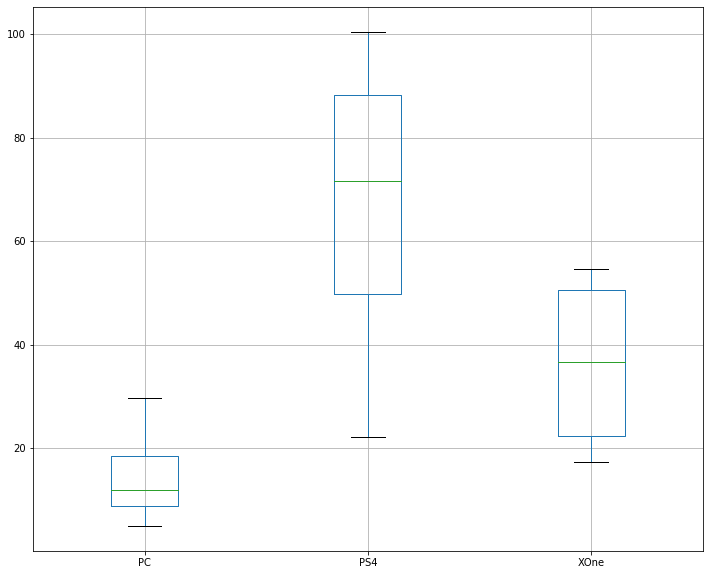

In [35]:
potential_platform.pivot_table(index = 'year_of_release',
                       values = 'total_sale',
                       columns = 'platform',
                       aggfunc = 'sum').boxplot(figsize = (12,10))

На данном графике у нас находятся ящики исходя из суммарных продаж. Видно, что медианные значения для PS4 и XOne сильно отличаются. У PS4 продажи значительно лучше, однако нижняя граница у двух платфор находится примерно на одинаковом значении (~20)

Рассмотрим такие же "ящики", но исходя из средних значений. 

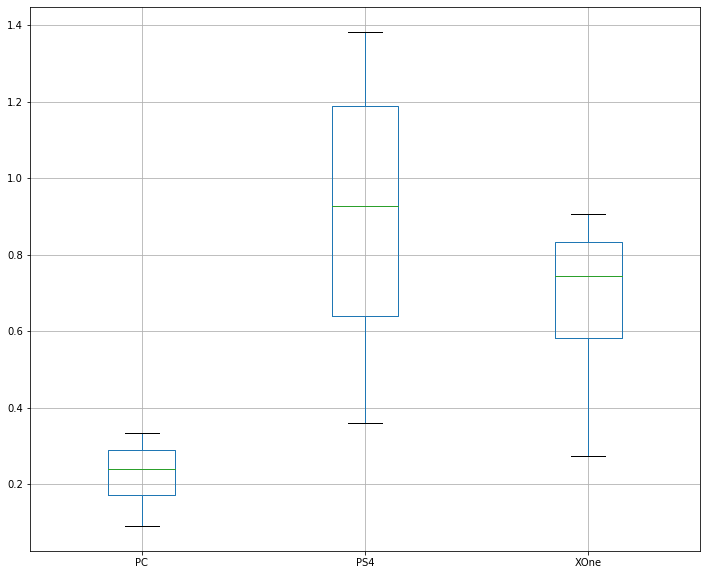

In [36]:
potential_platform.pivot_table(index = 'year_of_release',
                       values = 'total_sale',
                       columns = 'platform',
                       aggfunc = 'mean').boxplot(figsize = (12,10))

Ситуация изменилась, но не сильно. Медианные значения консолей сблизились.

### Влияние на продажи отзывов пользователей и критиков. 

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 

Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. 
Сформулируйте выводы. Соотнесите выводы с продажами игр на других платформах.



Для начала сформиурем таблицу по одной из популярных платформ - PS 4.

In [37]:
ps4_pivot = potential_platform.query('platform == "PS4"').reset_index(drop = True)

Для удобства, приведём рейтинги к единому формату (0-100). Это будет наглядно. 

In [38]:
ps4_pivot['user_score'] = ps4_pivot['user_score'].astype("float64")*10

Не забудем, что в пользовательском рейтинге имеются записи с отрицательным значением. Эти значения - ранее были *tbd* (оценка не определена). Посмотрим, сколько таких записей имеется. 

In [39]:
ps4_pivot.query('user_score < 0')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
334,Just Dance 2017,PS4,2016-01-01,Misc,0.02,0.0,0.0,0.01,73.0,-10.0,E10+,0.02
335,Let's Sing 2016,PS4,2015-01-01,Action,0.03,0.0,0.0,0.01,71.0,-10.0,T,0.03
349,Atari Flashback Classics: Volume 1,PS4,2016-01-01,Misc,0.02,0.0,0.0,0.00,71.0,-10.0,E,0.02
352,Assault Suit Leynos,PS4,2016-01-01,Shooter,0.02,0.0,0.0,0.00,67.0,-10.0,E10+,0.02
354,Atari Flashback Classics: Volume 2,PS4,2016-01-01,Misc,0.02,0.0,0.0,0.00,71.0,-10.0,E,0.02
377,King's Quest: The Complete Collection,PS4,2016-01-01,Adventure,0.01,0.0,0.0,0.00,71.0,-10.0,E10+,0.01


У нас получилось всего 6 значений. Исключим их из итоговой выборки при построении диаграммы. 

Построим диаграммы рассеяния для суммарных продаж в зависимости от оценок пользователей и критиков. 

Для построения воспользуемся библиотекой *seaborn* и её методом *.jointplot* со следующими параметрами:

* x - оценка пользователей / критиков
* y - продажи
* kind = 'scatter' - игры на распределении будут обозначены точками
* alpha = 0.5 - зададим 50% прозрачность для более простого обнаружения скопления основной массы игр

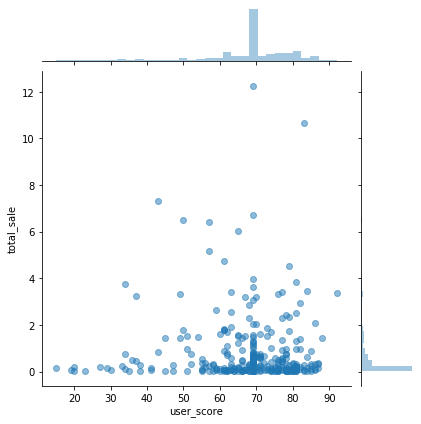

In [40]:
import seaborn as sns

sns.jointplot(x = ps4_pivot.query('user_score > 0')['user_score'],
            y = ps4_pivot.query('user_score > 0')['total_sale'],
             kind = 'scatter',
             data = ps4_pivot,
             alpha = 0.5)

По распределению видно, что основная доля пользовательских оценок расположена в промежутке 60-90. В этом промежутки наблюдаются самые большие продажи. Самая успешная игра (по кол-ву продаж) обладает рейтингом около 70. Посмотрим, что это за игра. 

In [41]:
ps4_pivot.sort_values(by = 'total_sale', ascending = False).head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
0,Call of Duty: Black Ops 3,PS4,2015-01-01,Shooter,6.03,5.86,0.36,2.38,71.0,69.0,-1,12.25
1,Grand Theft Auto V,PS4,2014-01-01,Action,3.96,6.31,0.38,1.97,97.0,83.0,M,10.65
2,FIFA 16,PS4,2015-01-01,Sports,1.12,6.12,0.06,1.28,82.0,43.0,E,7.30
3,Star Wars Battlefront (2015),PS4,2015-01-01,Shooter,2.99,3.49,0.22,1.28,71.0,69.0,-1,6.70
5,FIFA 17,PS4,2016-01-01,Sports,0.66,5.75,0.08,1.11,85.0,50.0,E,6.49
4,Call of Duty: Advanced Warfare,PS4,2014-01-01,Shooter,2.81,3.48,0.14,1.23,83.0,57.0,M,6.43
6,Fallout 4,PS4,2015-01-01,Role-Playing,2.53,3.27,0.24,1.13,87.0,65.0,M,6.04
7,FIFA 15,PS4,2014-01-01,Sports,0.80,4.33,0.05,0.90,82.0,57.0,E,5.18
8,Destiny,PS4,2014-01-01,Shooter,2.49,2.07,0.16,0.92,76.0,61.0,T,4.72
9,Uncharted 4: A Thief's End,PS4,2016-01-01,Shooter,1.85,2.50,0.19,0.85,93.0,79.0,T,4.54


Call of Duty: Black Ops 3 является самой продаваемой игрой, однако имеет пользовательский рейтинг всего 69 баллов. 

Посмотрим на распределение в зависимости от оценки критиков. 

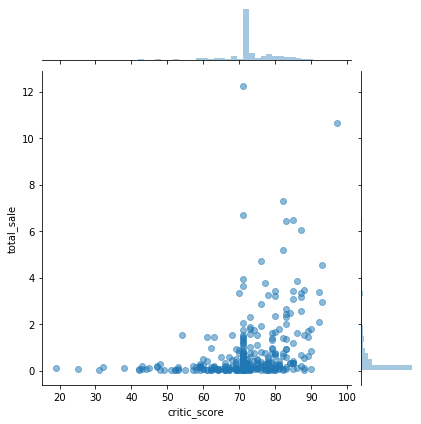

In [42]:
sns.jointplot(x = ps4_pivot['critic_score'],
            y = ps4_pivot['total_sale'],
             kind = 'scatter',
             data = ps4_pivot,
             alpha = 0.5)


Ситуация немного изменилась. Видно, что критики охватывают более широкий спектр оценок. Основное скопление игр находится в промежутке от 55 до 90 баллов. Самое большое кол-во находится в промежутке от 70 до 75 баллов. 

Если соотнести эти диаграммы, то можно увидеть следующие моменты:

* Оценки критиков ниже оценок пользователей примерно на 5-7 баллов.
* Самые продаваемые игры у критиков получают рейтинг выше 70 (от 70 до 73), а у пользователей ниже 70 баллов. 
* Критики используют более широкий спектр оценок для игр. 

В продолжении анализа посмотрим на корреляцию продаж от оценок. 

In [43]:
print("Корреляция пользовательских оценок от продаж")
ps4_pivot.query('user_score > 0')['user_score'].corr(ps4_pivot['total_sale'])

Корреляция пользовательских оценок от продаж


-0.032927771220520125

In [44]:
print("Корреляция оценок критиков от продаж")
ps4_pivot['critic_score'].corr(ps4_pivot['total_sale'])

Корреляция оценок критиков от продаж


0.33897155405714446

Видно, что корреляция между продажами и оценками критиков более явно выражена, чем от пользовательских оценок. 

### Распределение игр по жанрам

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Рассмотрим актуальные данные и создадим сводную таблицу со следующими параметрами:

* Жанры будут индексами
* Значения - суммарные продажи

Сохраним это в отдельную таблицу *actual_genre*

In [45]:
actual_genre = actual_games.pivot_table(index = 'genre',
                        values = 'total_sale',
                        aggfunc = 'sum').sort_values(by = 'total_sale', ascending = False)
actual_genre

,total_sale
genre,
Action,493.66
Shooter,354.37
Role-Playing,225.95
Sports,208.27
Misc,127.01
Platform,80.48
Racing,78.20
Fighting,60.25
Simulation,46.73


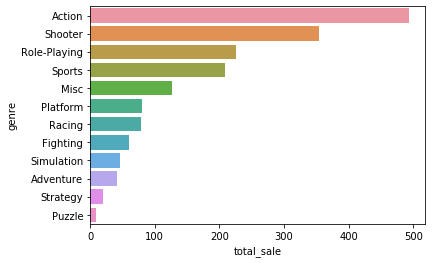

In [46]:
sns.barplot(y=actual_genre.index, x="total_sale", data=actual_genre)

Самыми прибыльными жанрами являются экшены, шутеры, RPG и спортивные игры. Безусловный лидер - экшен.

Самые низкие продажи наблюдаются в жанре пазлов и стратегий. Пазлы - не самый популярный жанр, так как это, в основном, не большие игры. Относительно стратегий - целевая платформа это PC. Судя по выводам, полученным выше - PC не самая прибыльная платформа. 

Данные выводы соотносятся с действительностью. Самая большая часть ААА проектов производится именно в самых прибыльных жанрах.

***В дополнение***, посмотрим на такое соотношения исходя из выборки за все года. 


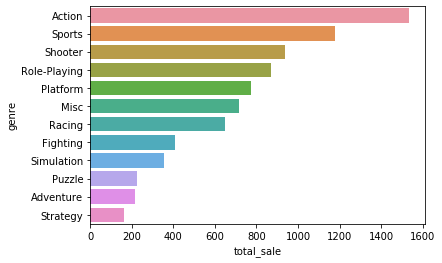

In [47]:
all_games_genre = games.pivot_table(index = 'genre',
                        values = 'total_sale',
                        aggfunc = 'sum').sort_values(by = 'total_sale', ascending = False)

sns.barplot(y=all_games_genre.index, x="total_sale", data=all_games_genre)

Указанные выше жанры были актуальны во все времена компьютерных игр. 

## 5. Портрет пользователя каждого региона

* Определите для пользователя каждого региона (NA, EU, JP):
        * Самые популярные платформы (топ-5). Опишите различия в долях продаж.
        * Самые популярные жанры (топ-5). Поясните разницу.
        * Влияет ли рейтинг ESRB на продажи в отдельном регионе?


Для определения регионов пользователей произведём сравнение продаж по всем регионам. 

Используем следующую логику:

Для получения портрета региона по продажам нам необходимо выделить самые популярные игры. Для этого мы сравним продажи региона с суммой продаж в других регионах. Если продажи превышают суммарные - эти игры наиболее интересны для данного региона и по ним можно проанализировать пользователей и их требования. 

Создадим следующие таблицы:

* na_games - общая таблица с самыми большими продажами в Северной Америке
    * na_platform_pivot - сводная таблица по платформам
    * na_genre_pivot - сводная таблица по жанрам
* eu_games - общая таблица с самыми большими продажами в Европе
    * eu_platform_pivot - сводная таблица по платформам
    * eu_genre_pivot - сводная таблица по жанрам
* jp_games - общая таблица с самыми большими продажами в Японии
    * jp_platform_pivot - сводная таблица по платформам
    * jp_genre_pivot - сводная таблица по жанрам


In [48]:
# NA 
na_games = actual_games.query('na_sales > eu_sales + jp_sales+other_sales')
na_platform_pivot = na_games.pivot_table(index = 'platform',
                            values = 'total_sale',
                            aggfunc = 'sum').head(5)
na_genre_pivot = na_games.pivot_table(index = 'genre',
                            values = 'total_sale',
                            aggfunc = 'sum').head(5)
# EU
eu_games = actual_games.query('eu_sales > na_sales + jp_sales+other_sales')
eu_platform_pivot = eu_games.pivot_table(index = 'platform',
                            values = 'total_sale',
                            aggfunc = 'sum').head(5)
eu_genre_pivot = eu_games.pivot_table(index = 'genre',
                            values = 'total_sale',
                            aggfunc = 'sum').head(5)
# JP
jp_games = actual_games.query('jp_sales > na_sales + eu_sales+other_sales')
jp_platform_pivot = jp_games.pivot_table(index = 'platform',
                            values = 'total_sale',
                            aggfunc = 'sum').head(5)
jp_genre_pivot = jp_games.pivot_table(index = 'genre',
                            values = 'total_sale',
                            aggfunc = 'sum').head(5)

Рассмотрим распределение по платформам для каждого региона. 

##### Платформы

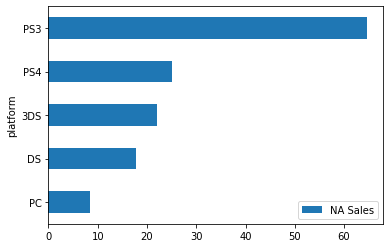

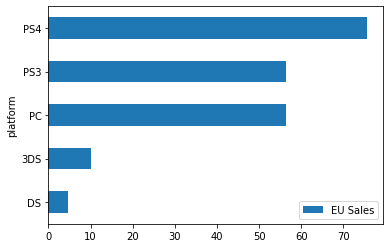

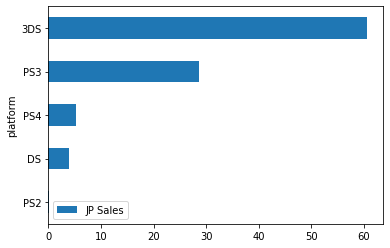

In [49]:
na_platform_pivot.sort_values(by = 'total_sale').plot(kind = 'barh').legend(['NA Sales'])

eu_platform_pivot.sort_values(by = 'total_sale').plot(kind = 'barh').legend(['EU Sales'])

jp_platform_pivot.sort_values(by = 'total_sale').plot(kind = 'barh').legend(['JP Sales'])


При сравнении распределения продаж видно, что в разных регионах лидируют разные консоли. 

В Северной Америке максимальные продажи приходятся на PS3, которая, как мы выяснили ранее, теряет продажи по всему миру. 

В Европе лидирует новая консоль - PS 4. Это консоль является актуальной и продажи должны расти. 2 место делят PS3 и PC. Наличие PC, вероятно, обусловлено предпочтением жанров. Это мы выясним далее.

В Японии полное лидерство за Nintendo 3DS. Это обусловлено большим количество эксклюзивных игра под данную консоль и наличием столь любимых серий игр для Японии - Pokemon, Mario bros, etc.


##### Распределение жанров



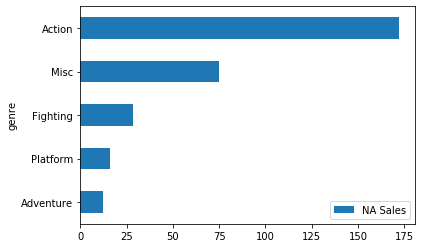

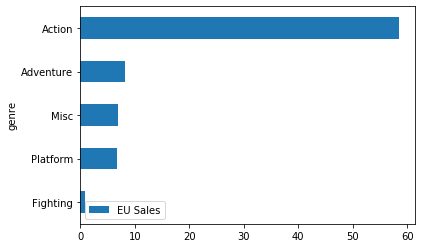

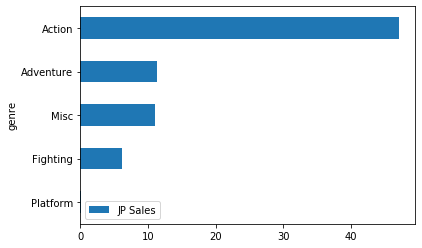

In [50]:
na_genre_pivot.sort_values(by = 'total_sale').plot(kind = 'barh').legend(['NA Sales'])

eu_genre_pivot.sort_values(by = 'total_sale').plot(kind = 'barh').legend(['EU Sales'])

jp_genre_pivot.sort_values(by = 'total_sale').plot(kind = 'barh').legend(['JP Sales'])


Все любят экшены. Это подтверждается большими продажами во всех регионах, однако далее начинаются различия. 

В Америке пользователи предпочитают файтинги, платформеры и другие жанры, которые не охватываются в нашей категоризации.

Европейские игроки любят приключения и платформеры.

Похожая ситуация и у Японских игроков, только кроме платформеров они предпочитают файтинги. 

##### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Закодируем наши рейтинги при помощи следующей конструкции:

```python
na_games['rating'].astype('category').cat.codes
```

В рейтинге у нас имеются записи с значением "-1". Эти значения означают, что рейтинг не известен. Исключим эти значения запросом 
```python
.query('rating != "-1")
```



In [51]:
na_games = na_games.query('rating != "-1"').assign(rating_code = na_games['rating'].astype('category').cat.codes) 
eu_games = eu_games.query('rating != "-1"').assign(rating_code = eu_games['rating'].astype('category').cat.codes) 
jp_games = jp_games.query('rating != "-1"').assign(rating_code = jp_games['rating'].astype('category').cat.codes) 

In [52]:
na_games['rating_code'].corr(na_games['total_sale'])

0.06819937219254825

In [53]:
eu_games['rating_code'].corr(eu_games['total_sale'])

-0.08271602161946809

In [54]:
jp_games['rating_code'].corr(jp_games['total_sale'])

-0.05586930555983592

## 6. Проверка гипотез

    1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    2. Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.
    
    
#####  1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Составим гипотезы:

* H_0 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
* Н_1 - Средние пользовательские рейтинги платформ Xbox One и PC отличаются

Доверительный интервал = 5% (*alpha = .05*)

Нам необходимо создать список пользовательских рейтингов. Для этого воспользуемся запросом *.query()* с двумя условиями:

* Platform == XOne или PC 
* Пользовательская оценка не равна -1. Ранее, мы производили замену неизвестных значений *tbd* на -1. Для того, чтобы исключить влияние таких значений - не будем их учитывать. 

Такие запросы мы выполним для двух случаев - для актуального периода (с 2010) и для всех доступных нам данных. 

 * xbox & pc - за все врёмя
 * xbox_act & pc_act - за актуальный промежуток времени. 

In [70]:
# Импортируем библиотеку scipy и её модуль stats. 
from scipy import stats as st

#Создаем списки для платформ за разные промежутки времени.
#Xbox
xbox_act = actual_games.query('platform == "XOne" and user_score != "-1"')['user_score'].astype('float64').to_list()
xbox = games.query('platform == "XOne" and user_score != "-1"')['user_score'].astype('float64').to_list()

#PC
pc_act = actual_games.query('platform == "PC" and user_score != "-1"')['user_score'].astype('float64').to_list()
pc = games.query('platform == "PC" and user_score != "-1"')['user_score'].astype('float64').to_list()

# Пороговое значение
alpha = 0.05

# Актуальный период 

results_act = st.ttest_ind(xbox_act, pc_act)
print('Since 2010\n##############')
print('P-val: ', results_act.pvalue)

if (results_act.pvalue < alpha):
    print("Не получилось отвергнуть альтернативную гипотезу")
else:
    print("Отвергаем альтернативную гипотезу")
    
results = st.ttest_ind(xbox, pc)
print('\nAll time\n##############')
print('P-val: ', results.pvalue)

if (results.pvalue < alpha):
    print("Не получилось отвергнуть альтернативную гипотезу")
else:
    print("Отвергаем альтернативную гипотезу")

Since 2010
##############
P-val:  0.6007901932439622
Отвергаем альтернативную гипотезу

All time
##############
P-val:  0.022149819518883472
Не получилось отвергнуть альтернативную гипотезу


У нас получились следующие результаты:

* ***За актуальный период - пользовательские рейтинги для Xbox One и PC примерно равны***
* ***Если учитывать всё время - средние рейтинги данных платформ отличаются.***

Такой результат может быть обусловлен тем, что PC намного дольше на рынке компьютерных игр. 

#####  2. Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

Составим гипотезы:

* H_0 - Средние пользовательские рейтинги жанров Action и Sports равны.
* Н_1 - Средние пользовательские рейтинги жанров Action и Sports отличаются.

Доверительный интервал = 5% (*alpha = .05*)

По аналогии с предыдущей гипотезой нам необходимо выполнить два запроса. 

Нам необходимо создать список пользовательских рейтингов. Для этого воспользуемся запросом *.query()* с двумя условиями:

* Genre == Action или Sports 
* Пользовательская оценка не равна -1. Ранее, мы производили замену неизвестных значений *tbd* на -1. Для того, чтобы исключить влияние таких значений - не будем их учитывать. 

Рассмотрим два случая:
1. Статистика оценок за весь досутпный нам период
2. Статистка оценок за актуальный период

Для этого воспользуемся переменными:

* action & sports - выборки по жанрам за всё время
* action_act & sports_act - выборки по жанрам за актуальный период


In [72]:
#Создаем списки для жанров за разные промежутки времени.
#Action
action_act = actual_games.query('genre == "Action" and user_score != "-1"')['user_score'].astype('float64').to_list()
action = games.query('genre == "Action" and user_score != "-1"')['user_score'].astype('float64').to_list()

#Sports
sports_act = actual_games.query('genre == "Sports" and user_score != "-1"')['user_score'].astype('float64').to_list()
sports = games.query('genre == "Sports" and user_score != "-1"')['user_score'].astype('float64').to_list()

# Пороговое значение
alpha = 0.05

# Актуальный период 

results_act = st.ttest_ind(action_act, sports_act)
print('Since 2010\n##############')
print('P-val: ', results_act.pvalue)

if (results_act.pvalue < alpha):
    print("Не получилось отвергнуть альтернативную гипотезу")
else:
    print("Отвергаем альтернативную гипотезу")

# За всё время

results = st.ttest_ind(action, sports)
print('\nAll time\n##############')
print('P-val: ', results.pvalue)

if (results.pvalue < alpha):
    print("Не получилось отвергнуть альтернативную гипотезу")
else:
    print("Отвергаем альтернативную гипотезу")

Since 2010
##############
P-val:  2.1184304530710344e-19
Не получилось отвергнуть альтернативную гипотезу

All time
##############
P-val:  7.042477851290033e-13
Не получилось отвергнуть альтернативную гипотезу


Наша гипотеза подтвердилась:

***Средние пользовательские оценки жанров Action и Sports отличаются***

Эта гипотеза справедлива как за актуальный период, так и за полный промежуток времени.

## 7. Вывод

В процессе работы был произведён анализ исторических данный о видеоиграх. В процессе анализа мы выполнили предобработку данных с исправлением некорректных значений и приведение к нужным типам. 

Было выполнено:

* Анализ значений *tbd*  в столбце с пользовательским рейтингом и его обработка
* Подсчёт суммарных продаж во всех регионах
* Анализ актуального периода с целью построения целей компании на следующий год. 
    * Выбор актуальных игровых платформ и вычисления платформ, с падающей прибылью.
    * Анализ средних продаж по актуальным платформам
    * Оценка влияния рейтинга пользователей / критиков на продажи
    * Выбор самых прибыльных жанров 
* Составлен портрет пользователей каждого региона. В этот портрет были включены предпочтения по платформам, жанром и влияние возрастного рейтинга. 


Гипотезы, требующие подтверждения в работе: 

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые - ***За актуальный период - подтверждено***
2. Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные. ***Подтверждено***


